## GRIP @ THE SPARKS FOUNDATION

# RAJESHWARI JEDHE

TASK 6-PREDICTION USING DECISION TREE ALGORITHM

Data is trained using Decision Tree Classifier. The purpose of the classifier is to classify iris plant into one of the 3    variety of it species based on some numerical atributes such as sepal length,petal width,etc.

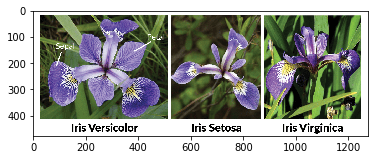

In [1]:
# LETS TAKE A LOOK AT HOW THESE SPECIES ARE.

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread("C:/Users/ADMIN/Desktop/IRIS.png")
plt.imshow(img)

In [2]:
# IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np

In [3]:
# IMPORTING DATA

iris=pd.read_csv(r"C:\Users\ADMIN\Desktop\GRIP AT SPARKS\1st TASK\iris.csv")

In [4]:
# METADATA

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


So we have 6 columns. Column ID is not needed. Next four are our explanatory variables and the last one is our target veriable.

In [6]:
# DROPPING 1ST COLUMN AND CHECKING IF THERE IS ANY MISSING DATA 

iris=iris.drop(["Id"],axis=1)
iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

There is no missing value in the data. 

In [7]:
iris.groupby("Species")["Species"].count()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Each specie has 50 instances.

In [8]:
# SEPARATING X(EXPLANATORY VARIABLES) AND Y(RESPONSE VARIABLE)

X = iris.iloc[:,:4]
y=iris["Species"]

In [9]:
# IMPORTING NECESSARY LIBRARIES

from sklearn.model_selection import KFold                 # TO CREATE FOLDS IN THE DATA
from sklearn.model_selection import RandomizedSearchCV    # FOR PARAMERTER TUNING AND CROSS VALIDATION
from sklearn.metrics import accuracy_score                # FOR MEASURING GOODNESS OF A MODEL
from sklearn.tree import DecisionTreeClassifier           # TO BUILD A DECISION TREE

In [10]:
KFold = KFold(n_splits=5,random_state = 2020)             # DATASET IS DIVIDED INTO 5 FOLDS

dtc = DecisionTreeClassifier(random_state = 2020)

depth_range = np.arange(3,12)                             # PARAMETERS
minsplit_range = np.arange(5,35,5)
minleaf_range = np.arange(2,16,3)

C:\Users\ADMIN\Anaconda3\envs\tensorflow-Env\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [11]:
parameters = dict(max_depth = depth_range,min_samples_split=minsplit_range,
                  min_samples_leaf=minleaf_range)

rdtc = RandomizedSearchCV(dtc, param_distributions=parameters,cv = KFold,scoring = "accuracy",random_state=2020)
rdtc.fit(X,y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
            

Best model is the model with that parameter combination which yields the highest acuuracy.

In [12]:
print(rdtc.best_params_)   # BEST PARAMETERS AFTER TUNING

{'min_samples_split': 25, 'min_samples_leaf': 5, 'max_depth': 7}


In [13]:
print("Accuracy of the best model is %2f"%(rdtc.best_score_))

Accuracy of the best model is 0.940000


In [14]:
best_model = rdtc.best_estimator_
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')


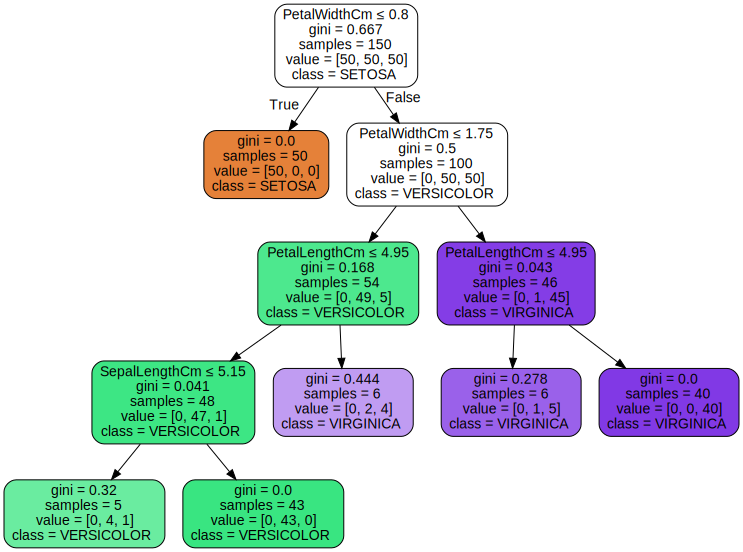

In [15]:
# VISUALIZING THE TREE

import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph 

from sklearn import tree
dot_data = tree.export_graphviz(best_model, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['SETOSA','VERSICOLOR','VIRGINICA'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Now any new data can  be fed into the classifier and we can get to know what specie the flower belongs to!